## Import the libraries Required For Project

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

### Data Collection
* ####  Load the data from csv file into a Pandas DataFrame

In [6]:
customer_data = pd.read_csv('Customer_dataset.csv')

##### Display The First 5 Rows of the DataFrame

In [7]:
print(customer_data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


##### Display Shape of The DataFrame

In [8]:
print("Shape of Dataset:", customer_data.shape)

Shape of Dataset: (200, 5)


##### Get Some Information about the Dataset

In [9]:
print(customer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


##### Check For Missing Values

In [10]:
print("Missing Values in Each Column:\n", customer_data.isnull().sum())

Missing Values in Each Column:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


#### Data Preprocessing
* ##### Handle Missing Values if Any
* ##### Assuming no Missing Values For This Dataset as per previous checks

#### Extract Relevant Features For Clustering

In [11]:
X = customer_data.iloc[:, [3, 4]].values  # Annual Income and Spending Score

#### Standardize The Features (Important for K-Means)

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Clustering
* #### Finding The Optimal Number of Clusters using the Elbow Method

In [13]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "A:\Software-Application-Files\Anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "A:\Software-Application-Files\Anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "A:\Software-Application-Files\Anaconda\Lib\subproc

#### Plot the Elbow Method Graph

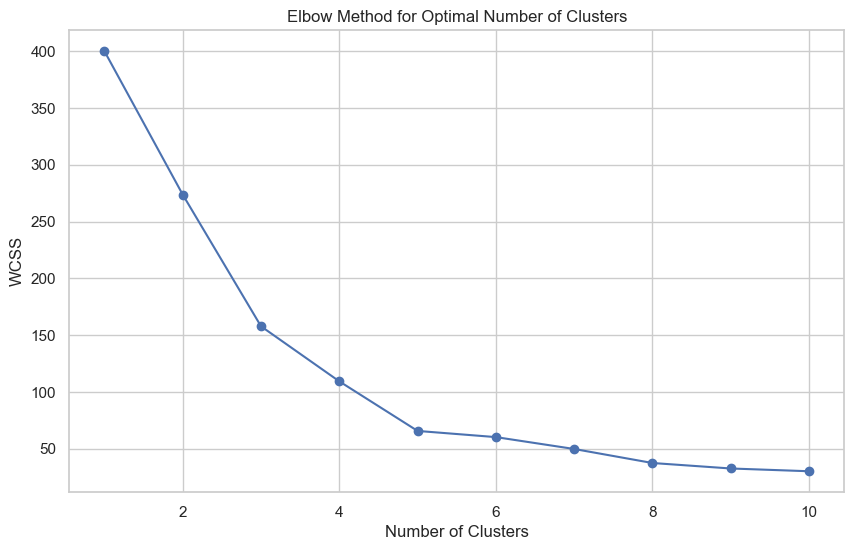

In [14]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Determine Optimal Number of Clusters using Silhouette Score
* ###### Optional, But Helps to Confirm The Number of Clusters)

In [15]:
sil_scores = []
for i in range(2, 11):  # Silhouette score is not defined for 1 cluster
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, labels)
    sil_scores.append(sil_score)
    
   

###  Plot Silhouette Scores

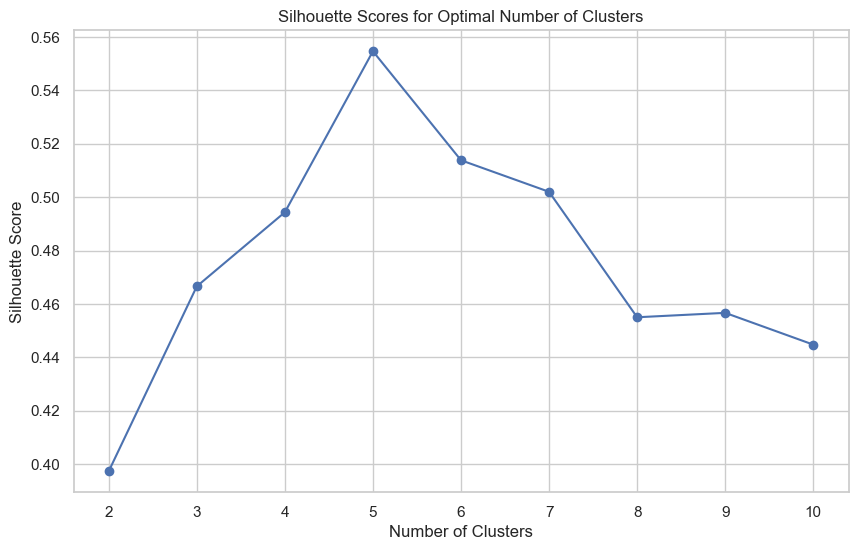

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Scores for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

### Apply K-Means with the Chosen Number of Clusters 

In [17]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
Y = kmeans.fit_predict(X_scaled)

#### Add Cluster Information To the Original Dataframe For Further Analysis

In [18]:
customer_data['Cluster'] = Y

### Analysis and Visualization
* #### Plot all Clusters and their Centroids

C:\Users\DELL\AppData\Local\Temp\ipykernel_1996\976403445.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_scaled[Y == i, 0], X_scaled[Y == i, 1], s=50, c=palette[i], label=f'Cluster {i+1}')


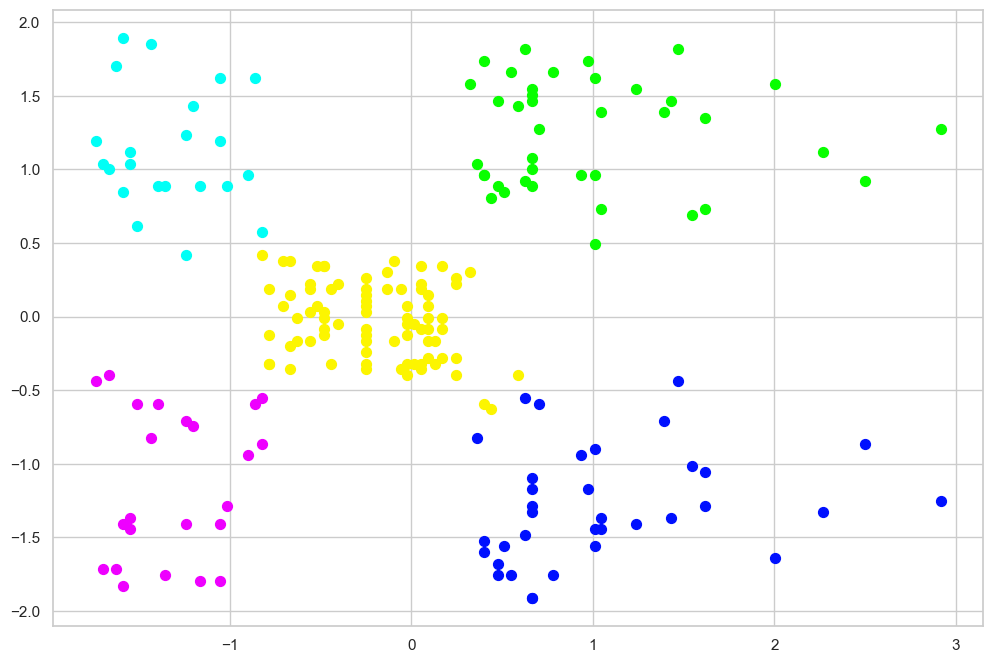

In [19]:
plt.figure(figsize=(12, 8))
palette = sns.color_palette("hsv", optimal_clusters)

for i in range(optimal_clusters):
    plt.scatter(X_scaled[Y == i, 0], X_scaled[Y == i, 1], s=50, c=palette[i], label=f'Cluster {i+1}')

 ###  Plot the Centroids 

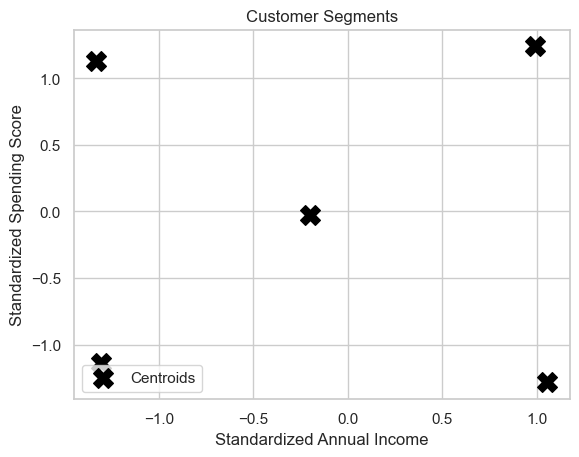

In [20]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids', marker='X')

plt.title('Customer Segments')
plt.xlabel('Standardized Annual Income')
plt.ylabel('Standardized Spending Score')
plt.legend()
plt.show()

#### Profile Each Customer Segment

In [21]:

# Get numeric columns for mean calculation
numeric_data = customer_data.select_dtypes(include=[float, int])
numeric_summary = numeric_data.groupby(customer_data['Cluster']).mean()

# Get non-numeric columns for other types of aggregation
non_numeric_data = customer_data.select_dtypes(include=[object])
# For example, get the most common value (mode) for non-numeric columns
non_numeric_summary = non_numeric_data.groupby(customer_data['Cluster']).agg(lambda x: x.mode()[0] if not x.mode().empty else 'N/A')

# Combine both summaries if needed
combined_summary = numeric_summary.join(non_numeric_summary)
print("\nCluster Profiles:\n", combined_summary)




Cluster Profiles:
          CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         86.320988  42.716049           55.296296               49.518519   
1        162.000000  32.692308           86.538462               82.128205   
2         23.090909  25.272727           25.727273               79.363636   
3        164.371429  41.114286           88.200000               17.114286   
4         23.000000  45.217391           26.304348               20.913043   

         Cluster  Gender  
Cluster                   
0            0.0  Female  
1            1.0  Female  
2            2.0  Female  
3            3.0    Male  
4            4.0  Female  
